# Recomendação de Characters

## Parte 1: Análise e Ajuste de Dados

### Importando o dataset

In [22]:
import pandas as pd
characters = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-16/characters.csv')
psych_stats  = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-16/psych_stats.csv')
print('Characters: ')
display(characters.head())
print('Psych Stats: ')
display(psych_stats.head())

Characters: 


,id,name,uni_id,uni_name,notability,link,image_link
0,F2,Monica Geller,F,Friends,79.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...
1,F1,Rachel Green,F,Friends,76.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...
2,F5,Chandler Bing,F,Friends,74.4,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...
3,F4,Joey Tribbiani,F,Friends,74.3,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...
4,F3,Phoebe Buffay,F,Friends,72.6,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...


Psych Stats: 


,char_id,char_name,uni_id,uni_name,question,personality,avg_rating,rank,rating_sd,number_ratings
0,F2,Monica Geller,F,Friends,messy/neat,neat,95.7,9,11.7,1079
1,F2,Monica Geller,F,Friends,disorganized/self-disciplined,self-disciplined,95.2,27,11.2,1185
2,F2,Monica Geller,F,Friends,diligent/lazy,diligent,93.9,87,10.4,1166
3,F2,Monica Geller,F,Friends,on-time/tardy,on-time,93.8,34,14.3,236
4,F2,Monica Geller,F,Friends,competitive/cooperative,competitive,93.6,56,13.4,1168


Explicando as notas de cada personagem:
- **question**: Pergunta se um personagem tem mais "um traço ou outro" (por exemplo, "Você é mais desorganizado ou disciplinado?").
- **personality**: O traço de personalidade do personagem (por exemplo, "desorganizado" ou "disciplinado").
- **avg_rating**: A nota média do personagem para aquele traço de personalidade, de 0 a 100. Por exemplo, se o personagem é "disciplinado", a nota média é 95.2

O único problema é que se o personagem é mais "disciplinado" do que "desorganizado", não há uma nota para "desorganizado".

In [23]:
psych_stats[(psych_stats['char_name'] == 'Monica Geller') & (psych_stats['question'] == 'disorganized/self-disciplined')]

,char_id,char_name,uni_id,uni_name,question,personality,avg_rating,rank,rating_sd,number_ratings
1,F2,Monica Geller,F,Friends,disorganized/self-disciplined,self-disciplined,95.2,27,11.2,1185


In [24]:
psych_stats[(psych_stats['char_name'] == 'Rachel Green') & (psych_stats['question'] == 'disorganized/self-disciplined')]

,char_id,char_name,uni_id,uni_name,question,personality,avg_rating,rank,rating_sd,number_ratings
504,F1,Rachel Green,F,Friends,disorganized/self-disciplined,disorganized,74.1,185,22.7,1159


Então temos que padronizar as notas para que todos os personagens tenham uma nota para cada traço de personalidade.
Perceba que a Mônica tem nota média 95.2 para "disciplinado", mas não tem nota para "desorganizado". Já a Rachel tem nota média 74.1 para "desorganizado", mas não tem nota para "disciplinado".

Para corrigir isso, vamos corrigir as notas de cada personagem, de forma que a referência seja sempre:
Exemplo: Para a question "disorganized/self-disciplined":	
- Se o personagem é mais "disciplinado" do que "desorganizado", não vamos alterar a nota.
- Se o personagem é mais "desorganizado" do que "disciplinado", vamos alterar a nota para 100 - nota média do personagem.

In [25]:
psych_stats[(psych_stats['uni_name'] == 'Friends') & (psych_stats['question'] == 'disorganized/self-disciplined')]

,char_id,char_name,uni_id,uni_name,question,personality,avg_rating,rank,rating_sd,number_ratings
1,F2,Monica Geller,F,Friends,disorganized/self-disciplined,self-disciplined,95.2,27,11.2,1185
504,F1,Rachel Green,F,Friends,disorganized/self-disciplined,disorganized,74.1,185,22.7,1159
1047,F5,Chandler Bing,F,Friends,disorganized/self-disciplined,disorganized,57.6,443,29.0,1133
1237,F4,Joey Tribbiani,F,Friends,disorganized/self-disciplined,disorganized,89.0,24,13.6,1210
1730,F3,Phoebe Buffay,F,Friends,disorganized/self-disciplined,disorganized,79.1,117,23.3,1121
2109,F6,Ross Geller,F,Friends,disorganized/self-disciplined,self-disciplined,75.6,744,27.0,1144


Além disso, vamos dividir a nota por 2, para que a nota média fique entre 0 e 50, para ser condizente com a escala das notas da Blooma, que são de 0 a 50 também.

In [26]:
def correct_rating(row):
    left, right = row["question"].split("/", 1)
    avg = row["avg_rating"]
    personality = row["personality"]

    if personality == left:
        corrected = (100 - avg)/2
    else:
        corrected = avg/2

    return corrected

psych_stats['avg_rating'] = psych_stats.apply(correct_rating, axis=1)

In [27]:
psych_stats[(psych_stats['uni_name'] == 'Friends') & (psych_stats['question'] == 'disorganized/self-disciplined')]

,char_id,char_name,uni_id,uni_name,question,personality,avg_rating,rank,rating_sd,number_ratings
1,F2,Monica Geller,F,Friends,disorganized/self-disciplined,self-disciplined,47.60,27,11.2,1185
504,F1,Rachel Green,F,Friends,disorganized/self-disciplined,disorganized,12.95,185,22.7,1159
1047,F5,Chandler Bing,F,Friends,disorganized/self-disciplined,disorganized,21.20,443,29.0,1133
1237,F4,Joey Tribbiani,F,Friends,disorganized/self-disciplined,disorganized,5.50,24,13.6,1210
1730,F3,Phoebe Buffay,F,Friends,disorganized/self-disciplined,disorganized,10.45,117,23.3,1121
2109,F6,Ross Geller,F,Friends,disorganized/self-disciplined,self-disciplined,37.80,744,27.0,1144


Agora está mais fácil de ler, certo? Se o personagem é mais "disciplinado" do que "desorganizado", a nota dele necessariamente será maior que 25. Observe o dataframe acima em relação ao dataframe antigo.

## Selecionando quais perguntas são relevantes para o nosso teste de Big 5

Aqui, pedi para o chatgpt me ajudar a selecionar quais perguntas são relevantes para o nosso teste de Big 5. É algo interessante para a validação da Carol/Psicóloga. Para extroversão, Socialização, Conscienciosidade, Estabilidade Emocional e Abertura a Experiências, selecionamos:

In [28]:
import numpy as np
BIG5_ITEMS = {
    # ─────────────────── EXTROVERSÃO ───────────────────
    "Extroversão": {
        "loud/quiet":               0.68,
        "chatty/reserved":          0.75,
        "assertive/passive":        0.64,
        "fast-talking/slow-talking":0.55,
        "bold/shy":                 0.72,
        "reclusive/social":         0.70, 
        "dominant/submissive":      0.60,
        "expressive/stoic":         0.59,
        "exuberant/subdued":        0.63,
        "extrovert/introvert":      0.90,
    },

    # ──────────────── SOCIALIZAÇÃO / AMABILIDADE ────────────────
    "Socialização": {
        "kind/cruel":               0.74,
        "loyal/traitorous":         0.66,
        "supportive/catty":         0.70,
        "nurturing/poisonous":      0.65,
        "forgiving/vengeful":       0.71,
        "accommodating/stubborn":   0.62,
        "giving/receiving":         0.67,
        "accepting/judgemental":    0.69,
        "respectful/rude":          0.73,
        "competitive/cooperative":  0.60,
    },

    # ───────────────── CONSCIENCIO-SIDADE ─────────────────
    "Conscienciosidade": {
        "diligent/lazy":                 0.76,
        "disorganized/self-disciplined": 0.78,  # self-disciplined = alto
        "on-time/tardy":                 0.66,
        "precise/vague":                 0.64,
        "scheduled/spontaneous":         0.60,
        "chaotic/orderly":               0.71,  # orderly = alto
        "motivated/unmotivated":         0.70,
        "workaholic/slacker":            0.72,
        "persistent/quitter":            0.69,
        "consistent/variable":           0.58,
    },

    # ──────────────── ESTABILIDADE EMOCIONAL ────────────────
    "Estabilidade emocional": {
        "anxious/calm":        0.76,
        "tense/relaxed":       0.72,
        "moody/stable":        0.70,
        "impatient/patient":   0.62,
        "confident/insecure":  0.68,
        "uptight/easy":        0.64,
        "hypochondriac/stoic": 0.57,
        "bright/depressed":    0.60,
    },

    # ──────────────── ABERTURA À EXPERIÊNCIA ────────────────
    "Abertura à experiência": {
        "imaginative/practical":              0.78,
        "creative/conventional":              0.74,
        "abstract/concrete":                  0.68,
        "adventurous/stick-in-the-mud":       0.72,
        "open to new experinces/uncreative":  0.77,
        "traditional/unorthodox":             0.71,  # unorthodox = alto
        "experimental/reliable":              0.64,
        "fantastical/realistic":              0.64,
        "routine/innovative":                 0.66,  # innovative = alto
        "flexible/rigid":                     0.63,
    },
}

# Cálculo das médias por traços do Big 5:
ratings_wide = psych_stats.pivot_table(index="char_name",
                                       columns="question",
                                       values="avg_rating")

# Para cada traço, calcula a média ponderada das perguntas disponíveis
for trait, questions in BIG5_ITEMS.items():
    w = pd.Series(questions)
    comuns = w.index.intersection(ratings_wide.columns)
    if comuns.empty:
        # Se não houver perguntas desse traço, preenche com NaN
        characters[trait] = np.nan
        continue
    w = w[comuns]
    # Calcula a média ponderada para cada personagem
    trait_scores = (ratings_wide[comuns] * w).sum(axis=1) / w.sum()
    # Atribui os valores ao DataFrame characters, alinhando pelo nome do personagem
    characters.loc[characters['name'].isin(trait_scores.index), trait] = characters['name'].map(trait_scores)

characters
# Verifica se a pergunta já existe no DataFrame

,id,name,uni_id,uni_name,notability,link,image_link,Extroversão,Socialização,Conscienciosidade,Estabilidade emocional,Abertura à experiência
0,F2,Monica Geller,F,Friends,79.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,14.634467,20.861069,14.647141,14.373155,34.603321
1,F1,Rachel Green,F,Friends,76.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,14.798595,26.896435,24.250000,14.297455,19.411580
2,F5,Chandler Bing,F,Friends,74.4,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,20.574408,20.672608,24.370507,21.070356,27.095422
3,F4,Joey Tribbiani,F,Friends,74.3,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,13.818861,16.519418,26.873203,18.636896,13.088779
4,F3,Phoebe Buffay,F,Friends,72.6,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,12.308728,15.640338,23.884886,17.198601,10.012478
...,...,...,...,...,...,...,...,...,...,...,...,...
884,SBSP1,SpongeBob SquarePants,SBSP,SpongeBob SquarePants,78.6,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,12.926627,11.528330,14.820180,12.241221,10.847397
885,SBSP4,Mr. Krabs,SBSP,SpongeBob SquarePants,73.9,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,12.531805,36.570356,18.291176,15.578244,30.766786
886,SBSP5,Sandy Cheeks,SBSP,SpongeBob SquarePants,66.9,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,11.875000,15.704128,16.547386,18.422901,19.375404
887,SBSP2,Patrick Star,SBSP,SpongeBob SquarePants,61.2,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,18.926331,19.745779,27.871242,16.027735,13.306643


### Vendo as distribuições de traços de personalidade

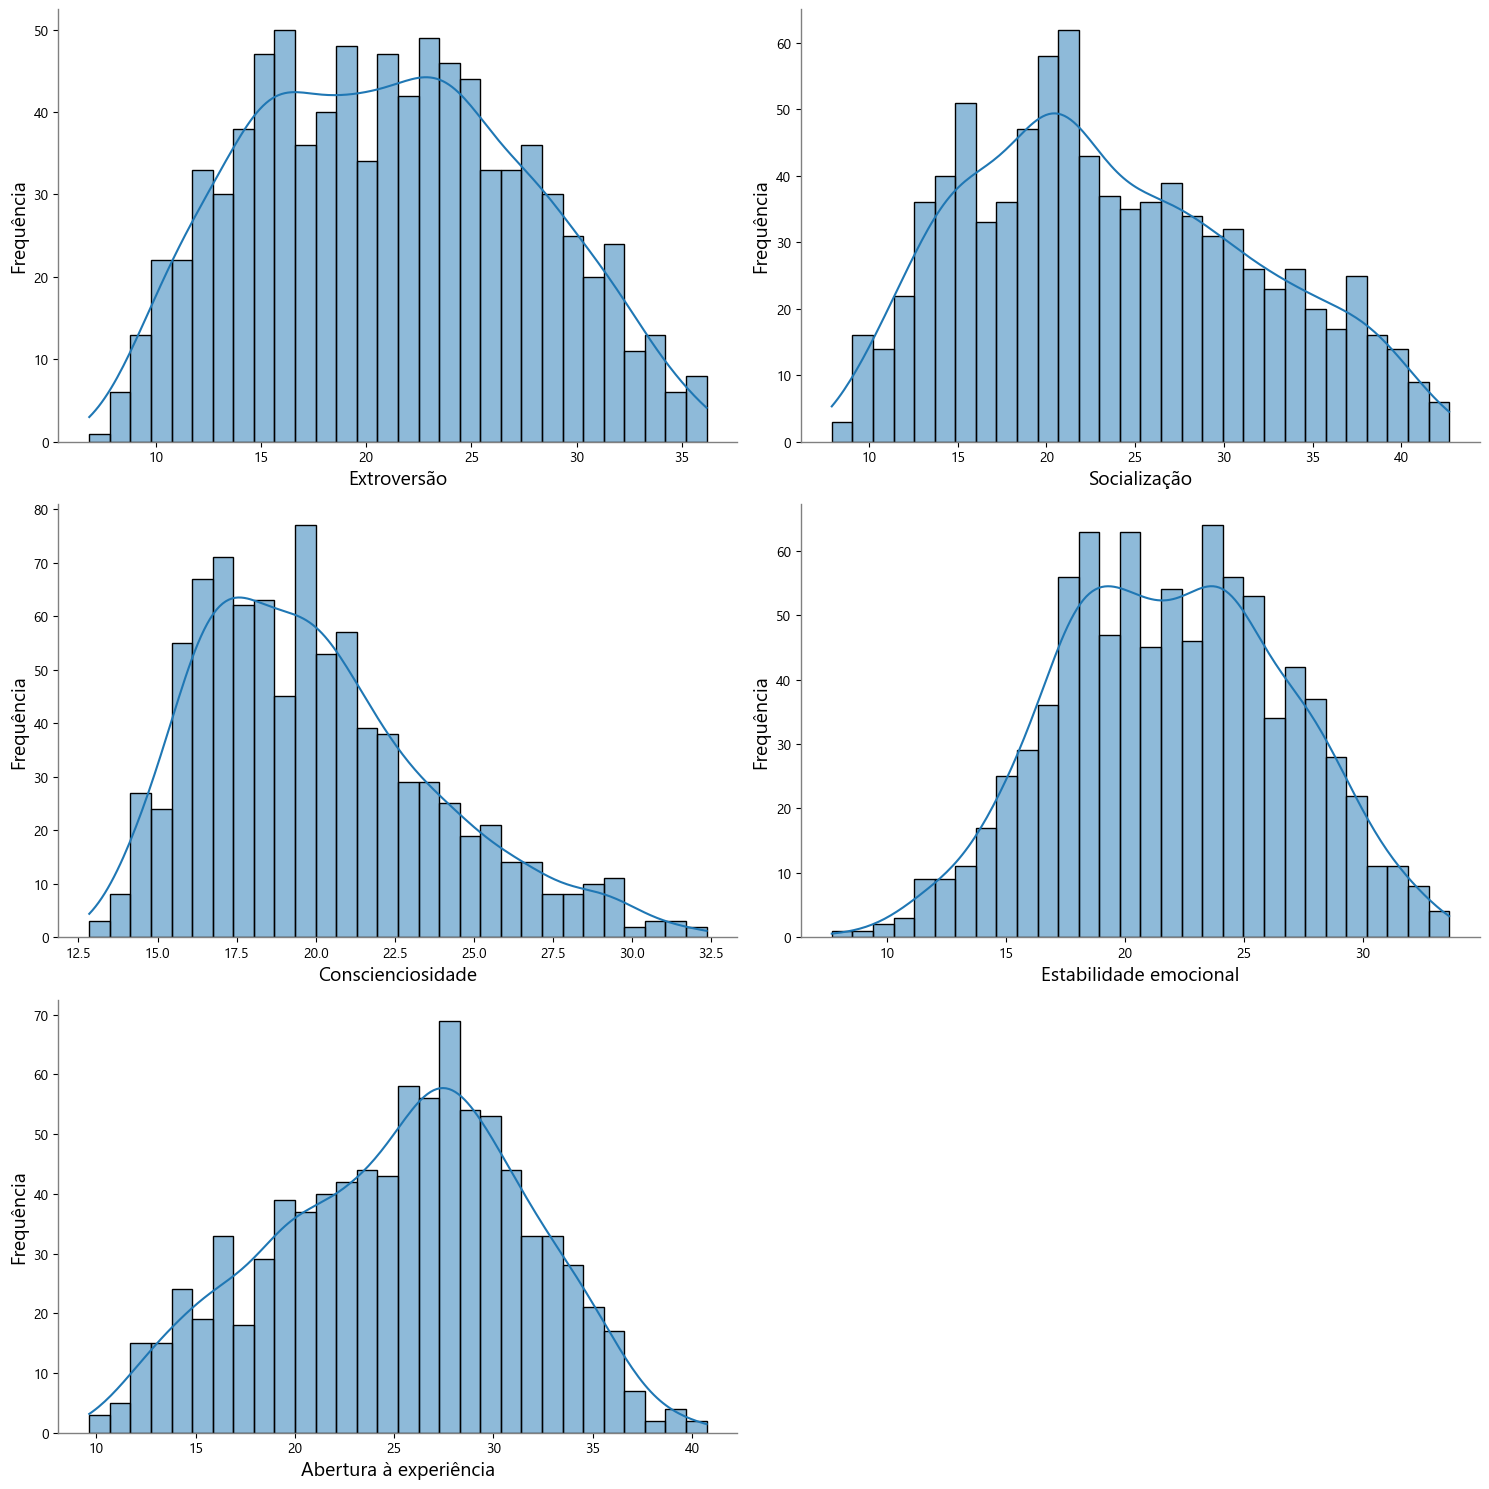

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# extroversão:
tracos = list(BIG5_ITEMS.keys())

cols = 2
rows = math.ceil(len(tracos) / cols)          

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()      
plt.rcParams['font.family'] = 'Segoe UI'                   

for i, trait in enumerate(tracos):
    ax = axes[i]
    sns.histplot(characters[trait].dropna(), kde=True, ax=ax, bins=30)
    sns.despine(ax=ax)
    ax.set_ylabel('Frequência', fontsize=14) 
    ax.set_xlabel(f'{trait}', fontsize=14)  
    
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)                    

for j in range(len(tracos), len(axes)):
    fig.delaxes(axes[j])                      

plt.tight_layout()
plt.show()

### Verificando as características principais de cada personagem

In [30]:
def extract_top_tags(df):
    return (
        df.sort_values("rank")
          .head(8)["personality"]
          .tolist()
    )

# Agrupar por personagem e aplicar a função de extração
top_tags = (
    psych_stats.groupby("char_name")
    .apply(extract_top_tags)
    .apply(lambda tags: ", ".join(tags))
    .rename("tags")
)

# Adiciona a coluna 'tags' ao DataFrame characters
characters["Tags"] = characters["name"].map(top_tags)

C:\Users\fealp\AppData\Local\Temp\ipykernel_12388\537633282.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(extract_top_tags)


### Verificando as séries mais populares

In [31]:
avaliacoes_por_serie = (
    psych_stats.groupby("uni_name")["number_ratings"]
    .mean()
    .sort_values(ascending=False)
    .rename("media_avaliacoes")
)

# Exibe o top 10 (ou quantos quiser)
avaliacoes_por_serie.head(10)

uni_name
The Lion King                784.600998
Friends                      682.299667
Pirates of the Carribean     553.738570
Star Wars                    518.839152
Sherlock                     456.524522
Mean Girls                   399.094015
Marvel Cinematic Universe    348.863508
Grey's Anatomy               315.952618
Parks and Recreation         314.216708
The Office                   297.090441
Name: media_avaliacoes, dtype: float64

In [32]:
characters.drop(columns=['id', 'uni_id'], inplace=True)
characters.rename(columns={'name': 'Personagem', 'uni_name': 'Universo'}, inplace=True)

characters.to_excel('characters_big5.xlsx', index=False)
characters.head()

,Personagem,Universo,notability,link,image_link,Extroversão,Socialização,Conscienciosidade,Estabilidade emocional,Abertura à experiência,Tags
0,Monica Geller,Friends,79.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,14.634467,20.861069,14.647141,14.373155,34.603321,"OCD, neat, washed, orderly, good-cook, hoarder..."
1,Rachel Green,Friends,76.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,14.798595,26.896435,24.250000,14.297455,19.411580,"bad-cook, trendy, modern, mainstream, cosmopol..."
2,Chandler Bing,Friends,74.4,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,20.574408,20.672608,24.370507,21.070356,27.095422,"comedic, ironic, sarcastic, 🤣, funny, 🤡, 🛌, he..."
3,Joey Tribbiani,Friends,74.3,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,13.818861,16.519418,26.873203,18.636896,13.088779,"nonpolitical, Italian, relaxed, 😎, simple, pla..."
4,Phoebe Buffay,Friends,72.6,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,12.308728,15.640338,23.884886,17.198601,10.012478,"artistic, open to new experinces, abstract, im..."


### Salvando os characteres com as alterações

## Parte 2: Recomendação de Characters

In [53]:
characters = pd.read_excel('characters_big5.xlsx')
characters.head()

,Personagem,Universo,notability,link,image_link,Extroversão,Socialização,Conscienciosidade,Estabilidade emocional,Abertura à experiência,Tags
0,Monica Geller,Friends,79.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,14.634467,20.861069,14.647141,14.373155,34.603321,"OCD, neat, washed, orderly, good-cook, hoarder..."
1,Rachel Green,Friends,76.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,14.798595,26.896435,24.250000,14.297455,19.411580,"bad-cook, trendy, modern, mainstream, cosmopol..."
2,Chandler Bing,Friends,74.4,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,20.574408,20.672608,24.370507,21.070356,27.095422,"comedic, ironic, sarcastic, 🤣, funny, 🤡, 🛌, he..."
3,Joey Tribbiani,Friends,74.3,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,13.818861,16.519418,26.873203,18.636896,13.088779,"nonpolitical, Italian, relaxed, 😎, simple, pla..."
4,Phoebe Buffay,Friends,72.6,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,12.308728,15.640338,23.884886,17.198601,10.012478,"artistic, open to new experinces, abstract, im..."


### Limpeza e Normalização dos Dados

In [54]:
from sklearn.preprocessing import MinMaxScaler

trait_cols = ["Extroversão","Socialização","Conscienciosidade",
              "Estabilidade emocional","Abertura à experiência"]

characters[trait_cols] = characters[trait_cols].apply(pd.to_numeric, errors="coerce")

characters.drop_duplicates(subset="Personagem", inplace=True)
characters.dropna(subset=trait_cols, inplace=True)


# fazendo uma normalização máx e mín
scaler = MinMaxScaler(feature_range=(-1, 1))
personagens = characters.copy()
personagens.loc[:, trait_cols] = scaler.fit_transform(characters[trait_cols])

personagens.head()

,Personagem,Universo,notability,link,image_link,Extroversão,Socialização,Conscienciosidade,Estabilidade emocional,Abertura à experiência,Tags
0,Monica Geller,Friends,79.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,-0.468132,-0.255182,-0.815037,-0.484073,0.605653,"OCD, neat, washed, orderly, good-cook, hoarder..."
1,Rachel Green,Friends,76.7,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,-0.456952,0.091668,0.169315,-0.489903,-0.371904,"bad-cook, trendy, modern, mainstream, cosmopol..."
2,Chandler Bing,Friends,74.4,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,-0.063505,-0.266012,0.181668,0.031718,0.122535,"comedic, ironic, sarcastic, 🤣, funny, 🤡, 🛌, he..."
3,Joey Tribbiani,Friends,74.3,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,-0.523691,-0.504694,0.438209,-0.155697,-0.778762,"nonpolitical, Italian, relaxed, 😎, simple, pla..."
4,Phoebe Buffay,Friends,72.6,https://openpsychometrics.org/tests/characters...,https://openpsychometrics.org/tests/characters...,-0.626561,-0.555215,0.131889,-0.266469,-0.976716,"artistic, open to new experinces, abstract, im..."


Vamos determinar **quantos vizinhos ( *K* )** e **qual peso ( *α* )** usar na nossa métrica híbrida para recomendações de personagens parecidos com base no Big 5.

### Passos a seguir

1. Usamos as cinco notas do Big 5, já padronizadas, como vetores em 5 D. Padronizar tira viés de escala entre traços.

2. Definir duas distâncias-base: *Cosine* (direção) e *Euclidiana* (intensidade). Cada uma captura um aspecto diferente de similaridade psicológica.

3. Métrica híbrida**: $$d_\text{mix} = \alpha\;d_\text{cos} \;+\; (1-\alpha)\; \tilde d_\text{euc}$$ onde $\tilde d_\text{euc}$ está normalizada em \([0,1]\). Combina **proporção** entre traços (cosseno) com **diferença absoluta** (euclidiana).

4. Treinamos `NearestNeighbors(metric='precomputed')` sobre a matriz $D_\text{mix}$. Facilita experimentar vários α sem recalcular índices vetoriais.

5. Curva do "cotovelo": Para cada α, calculamos a **distância média** ao vizinho *k*-ésimo e plotamos $\bar d_k \times k$. O “cotovelo” é o ponto onde a curva deixa de achatar ⇒ limite até onde ainda há vizinhos realmente próximos.


- Por que cosine? por que euclidiana?

* **Cosine distance** \((1-\cos\theta)\) mede apenas a **direção** do vetor: dois perfis com a mesma razão de traços, mesmo que um seja “mais intenso”, ficarão próximos.  
* **Euclidean distance** mede a **intensidade absoluta**: um usuário 80-80-80 não é parecido com 40-40-40 porque a norma difere.

> Ao combinar as duas, ganhamos um critério equilibrado: premiamos perfis com padrão proporcional **e** penalizamos diferenças grandes de magnitude.


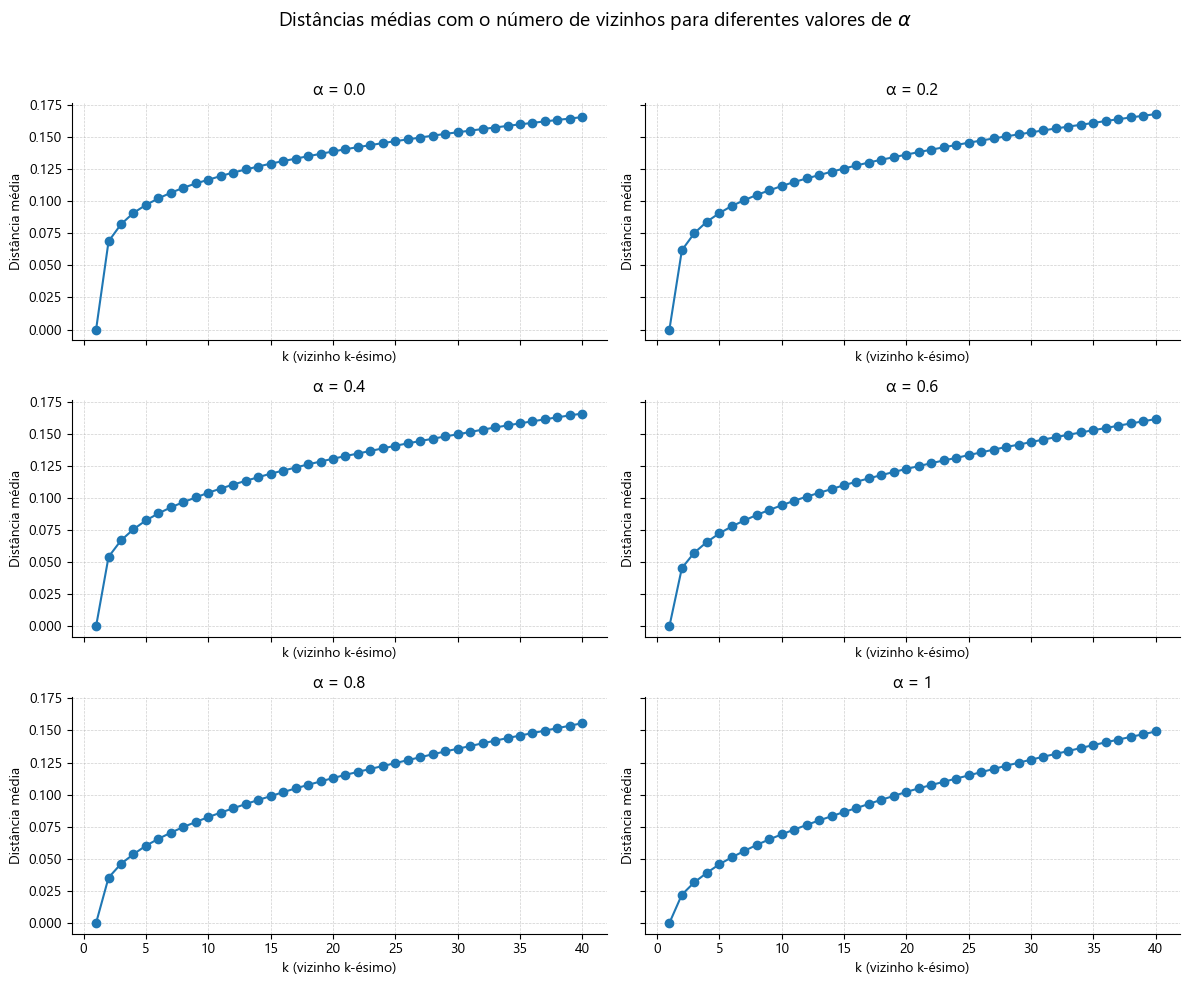

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

X_scaled = personagens[trait_cols].astype(float).values

D_cos = cosine_distances(X_scaled)
D_euc = euclidean_distances(X_scaled)
D_euc_norm = D_euc / D_euc.max()          # só normalizando

Kmax = 40
ks = range(1, Kmax + 1)
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1]


fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True, sharey=True)
plt.rcParams['font.family'] = 'Segoe UI'

for idx, alpha in enumerate(alphas):
    D = alpha * D_cos + (1 - alpha) * D_euc_norm
    knn = NearestNeighbors(metric="precomputed", n_neighbors=Kmax).fit(D)
    dists, _ = knn.kneighbors(D, n_neighbors=Kmax)
    mean_dist = [dists[:, k - 1].mean() for k in ks]

    ax = axes[idx // 2, idx % 2]
    ax.plot(ks, mean_dist, marker="o")
    ax.set_title(f"α = {alpha}")
    ax.set_xlabel("k (vizinho k-ésimo)")
    ax.set_ylabel("Distância média")
    sns.despine()
    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, alpha=0.6)

fig.suptitle(r"Distâncias médias com o número de vizinhos para diferentes valores de $\alpha$", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- Usando a métrica híbrida $d_{\text{híbrido}}=\alpha\,d_{\text{cos}}+(1-\alpha)\,d_{\text{euc-norm}}$, observamos que a curva de distância média dobra em $k\!\approx\!6$ para $\alpha\le 0.5$. Isso indica que, além do sexto vizinho, $\Delta d_k$ cresce quase linearmente, adicionando pouca similaridade real. 

    - Se $\alpha=0$ o algoritmo considera apenas a magnitude dos traços e descarta perfis com o mesmo “formato”; 
    - Se $\alpha=1$ ele faz o oposto, equiparando usuários extremos e medianos. 

- O valor $\alpha=0.5$ mantém equilíbrio entre direção e intensidade — preserva a proporcionalidade dos cinco fatores do Big Five e ainda diferencia pontuações muito altas ou muito baixas. Portanto, fixamos $\alpha=0.5$ no cálculo de $d_{\text{híbrido}}$ e restringimos a recomendação aos $k=6$ personagens mais próximos, garantindo relevância alta sem sobrecarregar o usuário.


### Modelo Final


In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances


trait_cols = ["Extroversão", "Socialização", "Conscienciosidade",
              "Estabilidade emocional", "Abertura à experiência"]

X = personagens[trait_cols].astype(float).values 
X_scaled = scaler.transform(X)

alpha = 0.5
D_cos = cosine_distances(X_scaled)              
D_euc = euclidean_distances(X_scaled)
D_euc_norm = D_euc / D_euc.max()                    

D = alpha * D_cos + (1 - alpha) * D_euc_norm

knn = NearestNeighbors(metric='precomputed', n_neighbors=6).fit(D)

max_euc = D_euc.max()   # necessário para normalizar a euclidiana do usuário


C:\Users\fealp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [65]:

def recommend(user_traits: dict, topk=6):
    # vetor do usuário - padronizado
    u = np.array([[user_traits[c] for c in trait_cols]])
    # scaler máx e mín igual feito no characters
    u_scaled = scaler.transform(u)

    # distâncias do usuário para cada personagem
    d_cos_u = cosine_distances(u_scaled, X_scaled)[0]
    d_euc_u = euclidean_distances(u_scaled, X_scaled)[0] / max_euc
    d_u = alpha * d_cos_u + (1 - alpha) * d_euc_u

    # usa o KNN já treinado
    dists, idxs = knn.kneighbors(d_u.reshape(1, -1), n_neighbors=topk)

    recs = characters.iloc[idxs[0]].copy()
    recs["Proximidade"] = dists[0]
    
    return recs[["Personagem", "Universo",
                 "Extroversão", "Socialização", "Conscienciosidade",
                 "Estabilidade emocional", "Abertura à experiência",
                 "Proximidade"]]

user = {
    "Extroversão": 49,
    "Socialização": 49,
    "Conscienciosidade": 44,
    "Estabilidade emocional": 39,
    "Abertura à experiência": 47
}


recomendacoes = recommend(user)

user_row = {**user, "Personagem": "Usuário", "Universo": "-", "Proximidade": "-"}
user_row_df = pd.DataFrame([user_row])
recomendacoes = pd.concat([user_row_df, recomendacoes], ignore_index=True)
recomendacoes = recomendacoes.reset_index(drop=True)
recomendacoes

C:\Users\fealp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Extroversão,Socialização,Conscienciosidade,Estabilidade emocional,Abertura à experiência,Personagem,Universo,Proximidade
0,49.000000,49.000000,44.000000,39.000000,47.000000,Usuário,-,-
1,35.381509,14.938368,32.353758,32.277099,18.710592,Nelson Bighetti,Silicon Valley,14.926676
2,30.278107,33.957974,27.993873,23.785623,37.249372,Stanley Hudson,The Office,14.932856
3,32.977367,37.432083,27.345670,21.407125,35.538600,Squidward Tentacles,SpongeBob SquarePants,14.937626
4,33.552737,25.134615,28.256373,27.363740,28.974147,Kermit,Shameless,14.946994
5,32.448373,26.004409,25.767729,30.594656,32.828815,Mark Brendanawicz,Parks and Recreation,14.952406
6,33.612500,24.042026,28.656209,25.632824,27.147935,Adam Groff,Sex Education,14.957738


In [66]:
user = {
    "Extroversão": 20,
    "Socialização": 40,
    "Conscienciosidade": 14,
    "Estabilidade emocional": 30,
    "Abertura à experiência": 45
}
recomendacoes = recommend(user)

user_row = {**user, "Personagem": "Usuário", "Universo": "-", "Proximidade": "-"}
user_row_df = pd.DataFrame([user_row])
recomendacoes = pd.concat([user_row_df, recomendacoes], ignore_index=True)
recomendacoes = recomendacoes.reset_index(drop=True)
recomendacoes

C:\Users\fealp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Extroversão,Socialização,Conscienciosidade,Estabilidade emocional,Abertura à experiência,Personagem,Universo,Proximidade
0,20.000000,40.000000,14.000000,30.000000,45.000000,Usuário,-,-
1,30.278107,33.957974,27.993873,23.785623,37.249372,Stanley Hudson,The Office,9.401113
2,32.977367,37.432083,27.345670,21.407125,35.538600,Squidward Tentacles,SpongeBob SquarePants,9.409009
3,32.448373,26.004409,25.767729,30.594656,32.828815,Mark Brendanawicz,Parks and Recreation,9.416112
4,22.948447,30.482176,27.700735,27.156743,32.788959,Tommy,Shameless,9.43395
5,32.444379,24.455347,24.579085,27.786641,34.313375,Niko Polastri,Killing Eve,9.434841
6,31.963462,31.439493,26.901307,24.518830,31.034560,Sam Healy,Orange is the New Black,9.437082


Observa que para dois users bem diferente tivemos alguns personagens em comum, o que pode estar acontecendo?